### Neural network classification

In [ ]:
import sklearn
from sklearn.datasets import make_circles

In [ ]:
# make samples
n_samples = 1000

# create circles
X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)

len(X), len(y)

(1000, 1000)

In [ ]:
print(f"First 5 sample of X:\n {X[:5]}")
print(f"First 5 sample of y:\n {y[:5]}")

First 5 sample of X:
 [[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]
First 5 sample of y:
 [1 1 1 1 0]


In [ ]:
import pandas as pd
circles = pd.DataFrame({"X1": X[:, 0], "X2": X[:, 1], "Label": y})

In [ ]:
circles.head(10)

,X1,X2,Label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


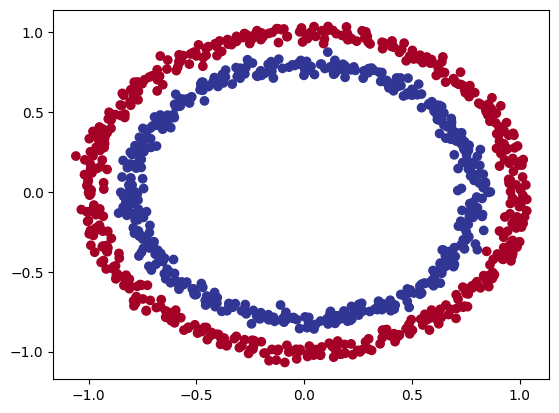

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(x=X[:, 0],
            y=X[:, 1],
            c=y,
            cmap=plt.cm.RdYlBu)

In [ ]:
X.shape, y.shape

((1000, 2), (1000,))

In [ ]:
X_sample = X[0]
y_sample = y[0]

print(f"Value of first sample point for X: {X_sample} and y: {y_sample}")
print(f"Shape of first sample point for X: {X_sample.shape} and y: {y_sample.shape}")

Value of first sample point for X: [0.75424625 0.23148074] and y: 1
Shape of first sample point for X: (2,) and y: ()


In [ ]:
# Turn data into tensors

In [ ]:
import torch
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

In [ ]:
X[:5], y[:5]

(tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533],
         [-0.8154,  0.1733],
         [-0.3937,  0.6929],
         [ 0.4422, -0.8967]]),
 tensor([1., 1., 1., 1., 0.]))

In [ ]:
# split train and test dataset
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.2, # 20% of data will be test set and rest for train
                                                    random_state=42)
len(X_train), len(X_test), len(y_train), len(y_test)

(800, 200, 800, 200)

### Build a model

In [ ]:
import torch.nn
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [ ]:
X_train.shape, y_train.shape

(torch.Size([800, 2]), torch.Size([800]))

In [ ]:
import torch
from torch import nn

In [ ]:
# construct a class that subclasses nn.Module
class CircleModelV0(nn.Module):
  def __init__(self):
    super().__init__()
    # define 2 layers
    self.Layer1 = nn.Linear(in_features = 2, out_features = 5)
    self.Layer2 = nn.Linear(in_features = 5, out_features = 1)

    # define forward() mtd
    def forward(self, x):
      return self.Layer2(self.Layer1(x)) # x goes to layer 1, output of layer1 -> input of layer 2 -> output of layer 2

In [ ]:
model_0 = CircleModelV0().to(device)
model_0

CircleModelV0(
  (Layer1): Linear(in_features=2, out_features=5, bias=True)
  (Layer2): Linear(in_features=5, out_features=1, bias=True)
)

In [ ]:
# let's replicate the model using nn.Sequential()
model_0 = nn.Sequential(
    nn.Linear(in_features=2, out_features=5),
    nn.Linear(in_features=5, out_features=1)
).to(device)
model_0

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [ ]:
model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[-0.3350,  0.5210],
                      [-0.2903, -0.3742],
                      [-0.0750, -0.3741],
                      [-0.0249, -0.5451],
                      [ 0.2191, -0.5434]], device='cuda:0')),
             ('0.bias',
              tensor([0.2995, 0.5616, 0.4719, 0.3429, 0.4889], device='cuda:0')),
             ('1.weight',
              tensor([[ 0.2803,  0.2981, -0.2576,  0.4294, -0.3667]], device='cuda:0')),
             ('1.bias', tensor([-0.2014], device='cuda:0'))])

In [ ]:
# make predictiona
with torch.inference_mode():
  untrained_preds = model_0(X_test.to(device))
print(f"Length of prediction: {len(untrained_preds)}")
print(f"Shape of prediction: {untrained_preds.shape}")
print(f"First 10 predictions: {torch.round(untrained_preds[:10])}")
print(f"First 10 labels: {y_test[:10]}")

Length of prediction: 200
Shape of prediction: torch.Size([200, 1])
First 10 predictions: tensor([[0.],
        [-0.],
        [0.],
        [0.],
        [-0.],
        [-0.],
        [-0.],
        [-0.],
        [0.],
        [-0.]], device='cuda:0')
First 10 labels: tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.])


In [ ]:
X_test[:10], y_test[:10]

(tensor([[-0.3752,  0.6827],
         [ 0.0154,  0.9600],
         [-0.7028, -0.3147],
         [-0.2853,  0.9664],
         [ 0.4024, -0.7438],
         [ 0.6323, -0.5711],
         [ 0.8561,  0.5499],
         [ 1.0034,  0.1903],
         [-0.7489, -0.2951],
         [ 0.0538,  0.9739]]),
 tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.]))

### setup loss function and optimizer

In [ ]:
loss_fn = nn.BCEWithLogitsLoss()

optimizer  = torch.optim.SGD(params = model_0.parameters(),
                             lr = 0.1)

In [ ]:
# claculate accuracy
def accuracy(y_true, y_pred):
  correct = torch.eq(y_true, y_pred).sum().item()
  acc = (correct / len(y_pred)) * 100
  return acc

In [ ]:
model_0.eval()
with torch.inference_mode():
  y_logits= model_0(X_test.to(device))[:10]
y_logits

tensor([[ 0.0566],
        [-0.0153],
        [ 0.0434],
        [ 0.0611],
        [-0.2765],
        [-0.3178],
        [-0.2666],
        [-0.3383],
        [ 0.0569],
        [-0.0236]], device='cuda:0')

In [ ]:
# using sigmoid activation fn to turn them into predication probabilityies
y_pred_prob = torch.sigmoid(y_logits)
y_pred_prob

tensor([[0.5141],
        [0.4962],
        [0.5108],
        [0.5153],
        [0.4313],
        [0.4212],
        [0.4337],
        [0.4162],
        [0.5142],
        [0.4941]], device='cuda:0')

In [ ]:
torch.round(y_pred_prob)

tensor([[1.],
        [0.],
        [1.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.]], device='cuda:0')

In [ ]:
y_test[:10]

tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.])

In [ ]:
# prediction lebels
y_preds = torch.round(y_pred_prob)

# in full (logits -> pred_prob -> pred lebels)
y_pred_lebel = torch.round(torch.sigmoid(model_0(X_test.to(device))[:10]))

# check for equality
print(torch.eq(y_preds.squeeze(), y_pred_lebel.squeeze()))

# reduce extra dim
y_preds.squeeze()

tensor([True, True, True, True, True, True, True, True, True, True],
       device='cuda:0')


tensor([1., 0., 1., 1., 0., 0., 0., 0., 1., 0.], device='cuda:0')

In [ ]:
# traing and testing loop

torch.manual_seed(42) # to ensure reproducibility

# set no. of epochs
epochs = 1000

# put data to training device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

# building training and evaluating loop
for epoch in range(epochs):
  # train model
  model_0.train()

  y_logits = model_0(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits))

  # cal loss/accuricy
  loss = loss_fn(y_logits, y_train)
  acc = accuracy(y_true=y_train, y_pred= y_pred)

  optimizer.zero_grad()

  loss.backward()

  optimizer.step()

  # testing
  model_0.eval()
  with torch.inference_mode():
    test_logits = model_0(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    # cal test loss/acc
    test_loss= loss_fn(test_logits, y_test)
    test_acc = accuracy(y_true=y_test, y_pred=test_pred)

  if epoch % 100 == 0:
    print(f"Epoch: {epoch} | Loss: {loss:.5f}, Acc: {acc:.2f}% | Test Loss: {test_loss:.5f}, Test Acc: {test_acc:.2f}%")

Epoch: 0 | Loss: 0.69836, Acc: 49.38% | Test Loss: 0.69694, Test Acc: 46.50%
Epoch: 100 | Loss: 0.69398, Acc: 50.00% | Test Loss: 0.69333, Test Acc: 49.00%
Epoch: 200 | Loss: 0.69327, Acc: 49.25% | Test Loss: 0.69358, Test Acc: 52.00%
Epoch: 300 | Loss: 0.69307, Acc: 50.50% | Test Loss: 0.69398, Test Acc: 48.50%
Epoch: 400 | Loss: 0.69301, Acc: 50.88% | Test Loss: 0.69427, Test Acc: 46.50%
Epoch: 500 | Loss: 0.69299, Acc: 50.75% | Test Loss: 0.69445, Test Acc: 47.00%
Epoch: 600 | Loss: 0.69298, Acc: 51.12% | Test Loss: 0.69455, Test Acc: 46.50%
Epoch: 700 | Loss: 0.69298, Acc: 51.38% | Test Loss: 0.69461, Test Acc: 46.00%
Epoch: 800 | Loss: 0.69298, Acc: 51.62% | Test Loss: 0.69464, Test Acc: 46.00%
Epoch: 900 | Loss: 0.69298, Acc: 51.50% | Test Loss: 0.69466, Test Acc: 44.50%


In [ ]:
import requests
from pathlib import Path

# Download helper functions from Learn PyTorch repo (if not already downloaded)
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary

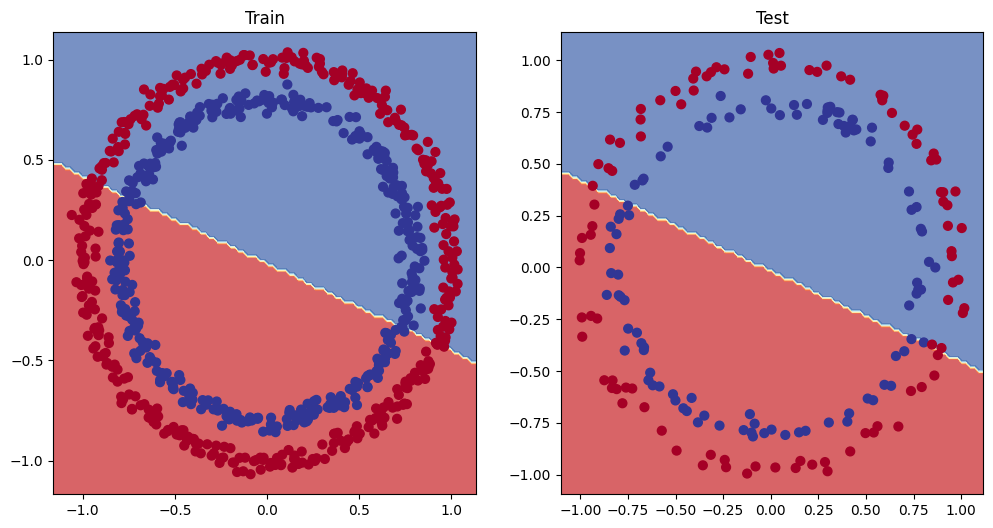

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_0, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_0, X_test, y_test)

### Improve a model
* add more layer
* add more hidden units
* fir for longer
* changing the activation function
* changing the learning rate
* changing the loss function

In [ ]:
class CircleModelV1(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features = 2, out_features = 128)
    self.layer_2 = nn.Linear(in_features=128, out_features=256)
    self.layer_3 = nn.Linear(in_features=256, out_features=128)
    self.layer_4 = nn.Linear(in_features=128, out_features=1)
  def forward(self, x):
    # z = self.layer_1(x)
    # z = torch.relu(z)
    # z = self.layer_2(z)
    # z = torch.relu(z)
    # z = self.layer
    # return z
    return self.layer_4(torch.relu(self.layer_3(torch.relu(self.layer_2(torch.relu(self.layer_1(x))))))) # relu is non-linear activation function

In [ ]:
model_1 = CircleModelV1().to(device)
model_1

CircleModelV1(
  (layer_1): Linear(in_features=2, out_features=128, bias=True)
  (layer_2): Linear(in_features=128, out_features=256, bias=True)
  (layer_3): Linear(in_features=256, out_features=128, bias=True)
  (layer_4): Linear(in_features=128, out_features=1, bias=True)
)

In [ ]:
# create a loss function
loss_fn = nn.BCEWithLogitsLoss()

In [ ]:
# create an optimizer
optimizer = torch.optim.Adam(params = model_1.parameters(),
                            lr = 0.1)

In [ ]:
# create a training and testing loop
torch.manual_seed(42)

epochs = 1000

X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(epochs):
  model_1.train()
  y_logits = model_1(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits))
  loss = loss_fn(y_logits, y_train)
  acc = accuracy(y_true=y_train, y_pred=y_pred)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  model_1.eval()
  with torch.inference_mode():
    test_logits= model_1(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))
    test_loss = loss_fn(test_logits, test_pred)
    test_acc = accuracy(y_true=y_test, y_pred=test_pred)

  if epoch % 100 == 0:
    print(f"Epoch: {epoch} | Loss: {loss:.5f}, Acc: {acc:.2f}% | Test Loss: {test_loss:.5f}, Test Acc: {test_acc:.2f}%")

Epoch: 0 | Loss: 0.69146, Acc: 59.38% | Test Loss: 0.00000, Test Acc: 50.00%
Epoch: 100 | Loss: 0.00000, Acc: 100.00% | Test Loss: 0.00008, Test Acc: 100.00%
Epoch: 200 | Loss: 0.00000, Acc: 100.00% | Test Loss: 0.00014, Test Acc: 100.00%
Epoch: 300 | Loss: 0.00000, Acc: 100.00% | Test Loss: 0.00013, Test Acc: 100.00%
Epoch: 400 | Loss: 0.00000, Acc: 100.00% | Test Loss: 0.00012, Test Acc: 100.00%
Epoch: 500 | Loss: 0.00000, Acc: 100.00% | Test Loss: 0.00010, Test Acc: 100.00%
Epoch: 600 | Loss: 0.00000, Acc: 100.00% | Test Loss: 0.00009, Test Acc: 100.00%
Epoch: 700 | Loss: 0.00000, Acc: 100.00% | Test Loss: 0.00008, Test Acc: 100.00%
Epoch: 800 | Loss: 0.00000, Acc: 100.00% | Test Loss: 0.00007, Test Acc: 100.00%
Epoch: 900 | Loss: 0.00000, Acc: 100.00% | Test Loss: 0.00007, Test Acc: 100.00%


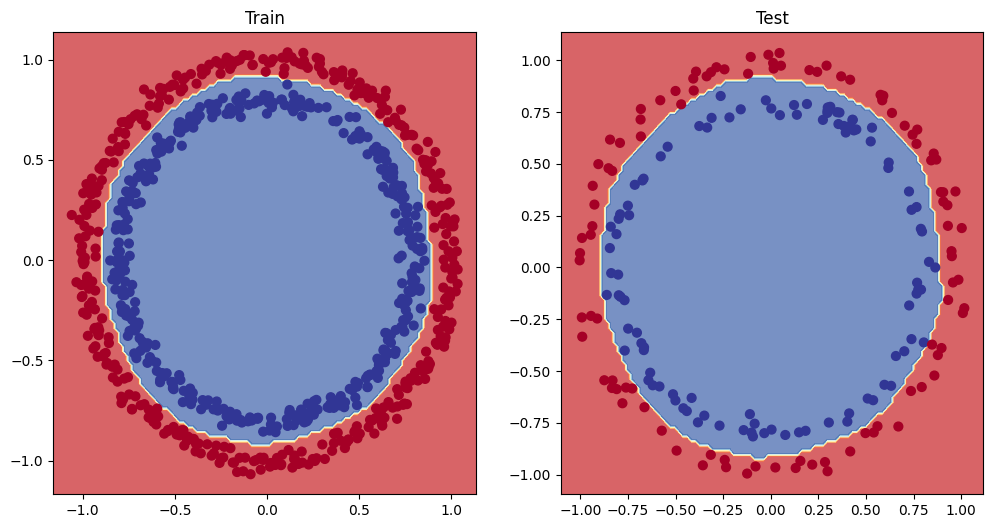

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_1, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_1, X_test, y_test)

## Creating multi-class classification data
* Create some multi-class data with make_blobs().
* Turn the data into tensors (the default of make_blobs() is to use NumPy arrays).
* Split the data into training and test sets using train_test_split().
* Visualize the data.

tensor([[-8.5550,  7.0646],
        [-6.1375, -6.5808],
        [-6.3213, -6.8041],
        [ 4.1805,  1.1233],
        [ 4.3803,  0.4700]]) tensor([3, 2, 2, 1, 1])


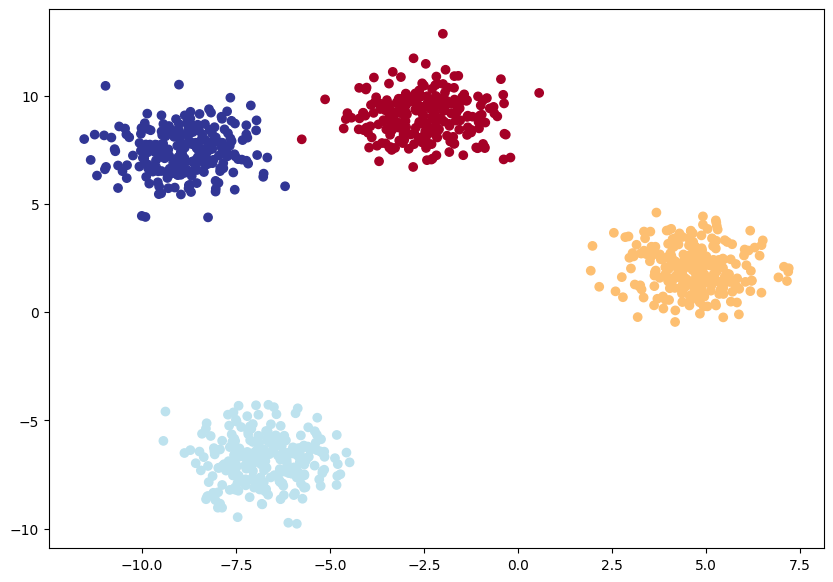

In [ ]:
# Import dependencies
import torch
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

# Set the hyperparameters for data creation
NUM_CLASSES = 4
NUM_FEATURES = 2
RANDOM_SEED = 42

# 1. Create multi-class data
X_blob, y_blob = make_blobs(n_samples=1000,
    n_features=NUM_FEATURES, # X features
    centers=NUM_CLASSES, # y labels
    cluster_std=1.0, # give the clusters a little shake up
    random_state=RANDOM_SEED
)

# 2. Turn data into tensors
X_blob = torch.from_numpy(X_blob).type(torch.float)
y_blob = torch.from_numpy(y_blob).type(torch.LongTensor)
print(X_blob[:5], y_blob[:5])

# 3. Split into train and test sets
X_blob_train, X_blob_test, y_blob_train, y_blob_test = train_test_split(X_blob,
    y_blob,
    test_size=0.2,
    random_state=RANDOM_SEED
)

# 4. Plot data
plt.figure(figsize=(10, 7))
plt.scatter(X_blob[:, 0], X_blob[:, 1], c=y_blob, cmap=plt.cm.RdYlBu);

### Building our first multi-class classification model

In [ ]:
# create device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [ ]:
# Build multi-class classification model
class BlobModelV0(nn.Module):
  def __init__(self, input_features, output_features, hidden_units = 8):
    super().__init__()
    self.linear_layer_stack = nn.Sequential(
        nn.Linear(in_features=input_features, out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units, out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units, out_features=output_features)
    )
  def forward(self,x):
    return self.linear_layer_stack(x)

In [ ]:
X_blob_train.shape, y_blob_train.shape

(torch.Size([800, 2]), torch.Size([800]))

In [ ]:
torch.unique(y_blob_train) # so we need 4 output_features

tensor([0, 1, 2, 3])

In [ ]:
model_2 = BlobModelV0(input_features=2, output_features=4, hidden_units=8).to(device)
model_2

BlobModelV0(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=8, bias=True)
    (3): ReLU()
    (4): Linear(in_features=8, out_features=4, bias=True)
  )
)

In [ ]:
# Create loss and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model_2.parameters(),
                            lr=0.1) # exercise: try changing the learning rate here and seeing what happens to the model's performance

In [ ]:
model_2.eval()
with torch.inference_mode():
  y_logits = model_2(X_blob_train.to(device))
y_logits

tensor([[-0.2864, -0.5702,  0.4625,  0.0692],
        [-0.7277,  0.2624, -0.3428,  0.2183],
        [-0.3584,  0.1495,  0.0204,  0.2465],
        ...,
        [-0.7284,  0.1957, -0.2862,  0.2441],
        [-0.3010,  0.0832,  0.0757,  0.1598],
        [-0.6528,  0.5018, -0.1456,  0.2864]], device='cuda:0')

In [ ]:
# Perform softmax calculation on logits across dimension 1 to get prediction probabilities
y_pred_probs = torch.softmax(y_logits, dim=1)
print(y_logits[:5])
print(y_pred_probs[:5])

tensor([[-0.2864, -0.5702,  0.4625,  0.0692],
        [-0.7277,  0.2624, -0.3428,  0.2183],
        [-0.3584,  0.1495,  0.0204,  0.2465],
        [-0.2866, -0.0195,  0.1944,  0.1018],
        [-0.5947,  0.1985, -0.2547,  0.1277]], device='cuda:0')
tensor([[0.1889, 0.1422, 0.3994, 0.2695],
        [0.1293, 0.3479, 0.1899, 0.3329],
        [0.1680, 0.2791, 0.2453, 0.3076],
        [0.1852, 0.2420, 0.2997, 0.2732],
        [0.1498, 0.3312, 0.2105, 0.3085]], device='cuda:0')


In [ ]:
y_pred = torch.argmax(y_pred_probs, dim=1)
y_pred[:5]

tensor([2, 1, 3, 2, 1], device='cuda:0')

In [ ]:
# Fit the model
torch.manual_seed(42)

# Set number of epochs
epochs = 100

# Put data to target device
X_blob_train, y_blob_train = X_blob_train.to(device), y_blob_train.to(device)
X_blob_test, y_blob_test = X_blob_test.to(device), y_blob_test.to(device)

for epoch in range(epochs):
    ### Training
    model_2.train()

    # 1. Forward pass
    y_logits = model_2(X_blob_train) # model outputs raw logits
    y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1) # go from logits -> prediction probabilities -> prediction labels
    # print(y_logits)
    # 2. Calculate loss and accuracy
    loss = loss_fn(y_logits, y_blob_train)
    acc = accuracy(y_true=y_blob_train,
                      y_pred=y_pred)

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backwards
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    ### Testing
    model_2.eval()
    with torch.inference_mode():
      # 1. Forward pass
      test_logits = model_2(X_blob_test)
      test_pred = torch.softmax(test_logits, dim=1).argmax(dim=1)
      # 2. Calculate test loss and accuracy
      test_loss = loss_fn(test_logits, y_blob_test)
      test_acc = accuracy(y_true=y_blob_test,
                             y_pred=test_pred)

    # Print out what's happening
    if epoch % 10 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Acc: {acc:.2f}% | Test Loss: {test_loss:.5f}, Test Acc: {test_acc:.2f}%")

Epoch: 0 | Loss: 1.60502, Acc: 8.25% | Test Loss: 1.36084, Test Acc: 43.50%
Epoch: 10 | Loss: 0.71399, Acc: 72.88% | Test Loss: 0.59303, Test Acc: 79.50%
Epoch: 20 | Loss: 0.45918, Acc: 73.75% | Test Loss: 0.37240, Test Acc: 79.50%
Epoch: 30 | Loss: 0.36944, Acc: 95.62% | Test Loss: 0.29497, Test Acc: 97.00%
Epoch: 40 | Loss: 0.31162, Acc: 98.38% | Test Loss: 0.24659, Test Acc: 99.50%
Epoch: 50 | Loss: 0.26722, Acc: 99.12% | Test Loss: 0.21041, Test Acc: 99.50%
Epoch: 60 | Loss: 0.23150, Acc: 99.62% | Test Loss: 0.18174, Test Acc: 99.50%
Epoch: 70 | Loss: 0.20229, Acc: 99.75% | Test Loss: 0.15854, Test Acc: 100.00%
Epoch: 80 | Loss: 0.17819, Acc: 99.88% | Test Loss: 0.13950, Test Acc: 100.00%
Epoch: 90 | Loss: 0.15817, Acc: 99.88% | Test Loss: 0.12375, Test Acc: 100.00%


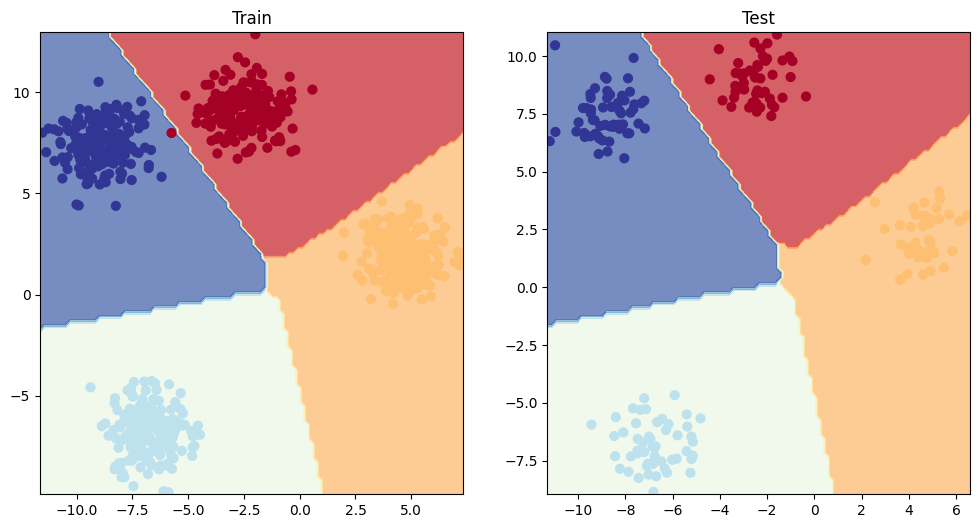

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_2, X_blob_train, y_blob_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_2, X_blob_test, y_blob_test)